In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
df = pd.read_csv('train.csv')

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df.shape

(1460, 83)

### Histogram of Sale Price

In [29]:
from scipy import stats

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

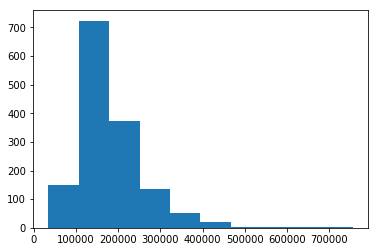

In [14]:
plt.hist(df.SalePrice)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.164745194168, 180921.19589041095, 0.93196656415129864))

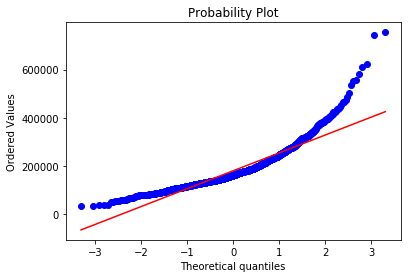

In [31]:
stats.probplot(df.SalePrice,plot=plt)

(array([   5.,   12.,   54.,  184.,  470.,  400.,  220.,   90.,   19.,    6.]),
 array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
         11.68993448,  11.99735757,  12.30478066,  12.61220375,
         12.91962684,  13.22704994,  13.53447303]),
 <a list of 10 Patch objects>)

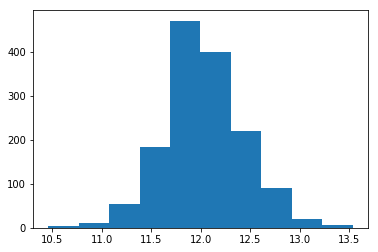

In [16]:
plt.hist(np.log(df.SalePrice))

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.164745194168, 180921.19589041095, 0.93196656415129864))

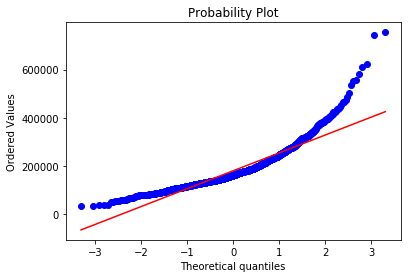

In [32]:
stats.probplot(df.SalePrice,plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39826223081618872, 12.024050901109383, 0.99537614756366133))

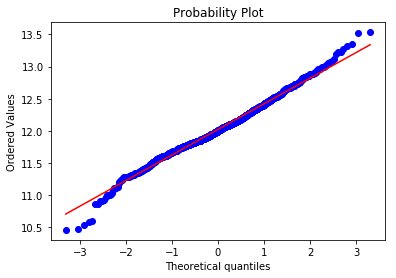

In [25]:
sps.probplot(np.log(df.SalePrice),plot=plt)

We see from the above that as indicated in the kaggle description, sales price is positive skew so we will use the logrithm of sales price as the target variable

In [26]:
df['LogSalePrice'] = np.log(df.SalePrice)

### Lot Area

(array([  1.42300000e+03,   2.40000000e+01,   8.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   1300. ,   22694.5,   44089. ,   65483.5,   86878. ,  108272.5,
         129667. ,  151061.5,  172456. ,  193850.5,  215245. ]),
 <a list of 10 Patch objects>)

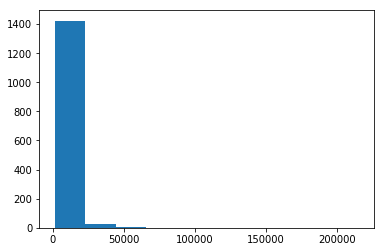

In [34]:
plt.hist(df.LotArea)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([  1300,   1477,   1491, ..., 159000, 164660, 215245])),
 (5888.7613579663648, 10516.828082191783, 0.58900765049099124))

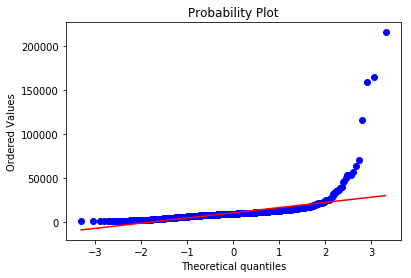

In [36]:
stats.probplot(df.LotArea,plot=plt)

(array([  31.,   48.,  131.,  640.,  528.,   58.,   12.,    8.,    1.,    3.]),
 array([  7.17011954,   7.68106081,   8.19200207,   8.70294334,
          9.2138846 ,   9.72482587,  10.23576713,  10.7467084 ,
         11.25764966,  11.76859093,  12.27953219]),
 <a list of 10 Patch objects>)

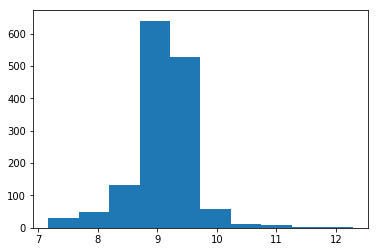

In [35]:
plt.hist(np.log(df.LotArea))

Lot Area is likewise heavily right skewed so we will also use the log of it

In [37]:
df['LogLotArea'] = np.log(df.LotArea)

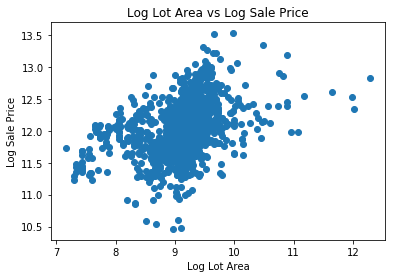

In [40]:
plt.scatter(df.LogLotArea,df.LogSalePrice)
plt.title("Log Lot Area vs Log Sale Price")
plt.xlabel("Log Lot Area")
plt.ylabel("Log Sale Price")
plt.show()

In [45]:
df[['LogLotArea','LogSalePrice']].corr()

,LogLotArea,LogSalePrice
LogLotArea,1.000000,0.399918
LogSalePrice,0.399918,1.000000


We see there is a slight positive correlation between lot area and sale price

### Year Built

(array([   9.,    6.,   37.,  122.,   83.,  128.,  261.,  223.,  139.,  452.]),
 array([ 1872. ,  1885.8,  1899.6,  1913.4,  1927.2,  1941. ,  1954.8,
         1968.6,  1982.4,  1996.2,  2010. ]),
 <a list of 10 Patch objects>)

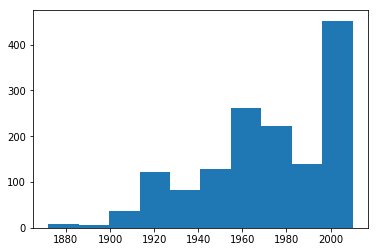

In [49]:
plt.hist(df.YearBuilt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([1872, 1875, 1880, ..., 2009, 2009, 2010])),
 (29.118569813612464, 1971.2678082191781, 0.96250701093617863))

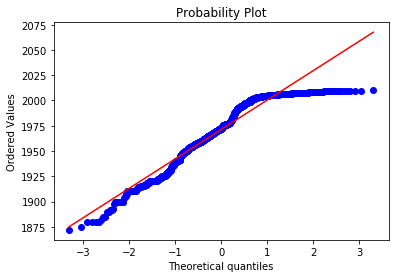

In [53]:
stats.probplot(df.YearBuilt,plot=plt)

[Text(0,0.5,'Log Lot Area'),
 Text(0.5,0,'Year Built'),
 Text(0.5,1,'Year Built vs Log Lot Area')]

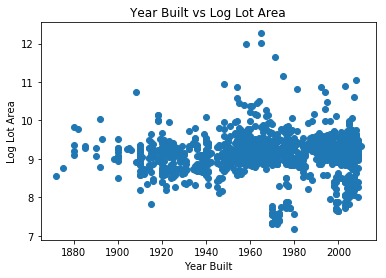

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df.YearBuilt,df.LogLotArea)
ax.set(title="Year Built vs Log Lot Area",xlabel="Year Built",ylabel="Log Lot Area")

There isn't much of a correlation here unfortunately

In [66]:
df[['YearBuilt','LogLotArea']].corr()

,YearBuilt,LogLotArea
YearBuilt,1.000000,0.021937
LogLotArea,0.021937,1.000000


### Choosing Features by Correlations

In [81]:
df.corr().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSalePrice',
       'LogLotArea'],
      dtype='object')

In [83]:
df.corr()['LogSalePrice'].to_frame().sort_values('LogSalePrice')

,LogSalePrice
EnclosedPorch,-0.149050
KitchenAbvGr,-0.147548
MSSubClass,-0.073959
LowQualFinSF,-0.037963
YrSold,-0.037263
OverallCond,-0.036868
MiscVal,-0.020021
Id,-0.017942
BsmtHalfBath,-0.005149
BsmtFinSF2,0.004832


From this we can design an MVP model using the highest correlations.

To start we will examine the top six features: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF and 1stFirSF

### Overall Quality

(array([   2.,    3.,   20.,  116.,  397.,  374.,  319.,  168.,   43.,   18.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

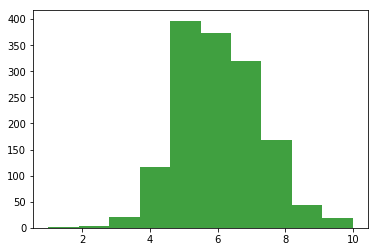

In [103]:
plt.hist(df.OverallQual,facecolor="green",alpha=0.75)

In [92]:
import seaborn as sns

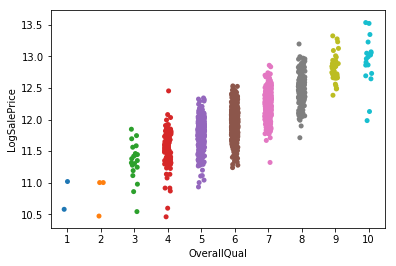

In [93]:
sns.stripplot(x="OverallQual",y="LogSalePrice",data=df,jitter=True)

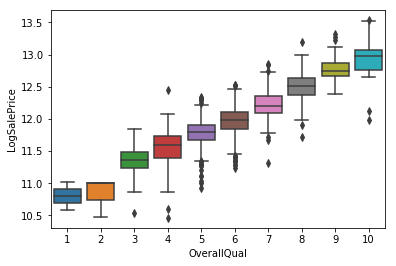

In [96]:
sns.boxplot(x="OverallQual",y="LogSalePrice",data=df)

As shown by the correlation chart, there is a strong relationship between Overall Quality and Log Sale Price